In [1]:
import numpy as np
import random
seed = 666
random.seed(seed)
np.random.seed(seed)

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score

from clusterless import data_preprocess
from clusterless import viz_tools

load data

In [2]:
rootpath = "data"
sub_id = "dy016"
samp_freq = 30_000

In [3]:
spikes_indices, spikes_features, np1_channel_map, stimulus_onset_times, unsorted, trials = \
    data_preprocess.load_unsorted_data(rootpath, sub_id, keep_active_trials=False, samp_freq=samp_freq)

In [8]:
ks_spikes_times, ks_spikes_clusters, ks_spikes_amps, ks_spikes_depths, sorted, ks_trials = \
    data_preprocess.load_kilosort_sorted_data(rootpath, sub_id, keep_active_trials=False, samp_freq=samp_freq)

In [3]:
behave_dict, behave_idx_dict = data_preprocess.load_behaviors_data(rootpath, sub_id)

In [3]:
temp_amps, x_mad_scaled, z_mad_scaled = data_preprocess.load_kilosort_template_feature_mads(rootpath, sub_id)

In [4]:
choices, stimuli, transformed_stimuli, rewards, priors = data_preprocess.preprocess_static_behaviors(behave_dict)

choices left: 0.769, right: 0.231
stimuli left: 0.507, right: 0.493
reward wrong: 0.231, correct: 0.769


visualize data

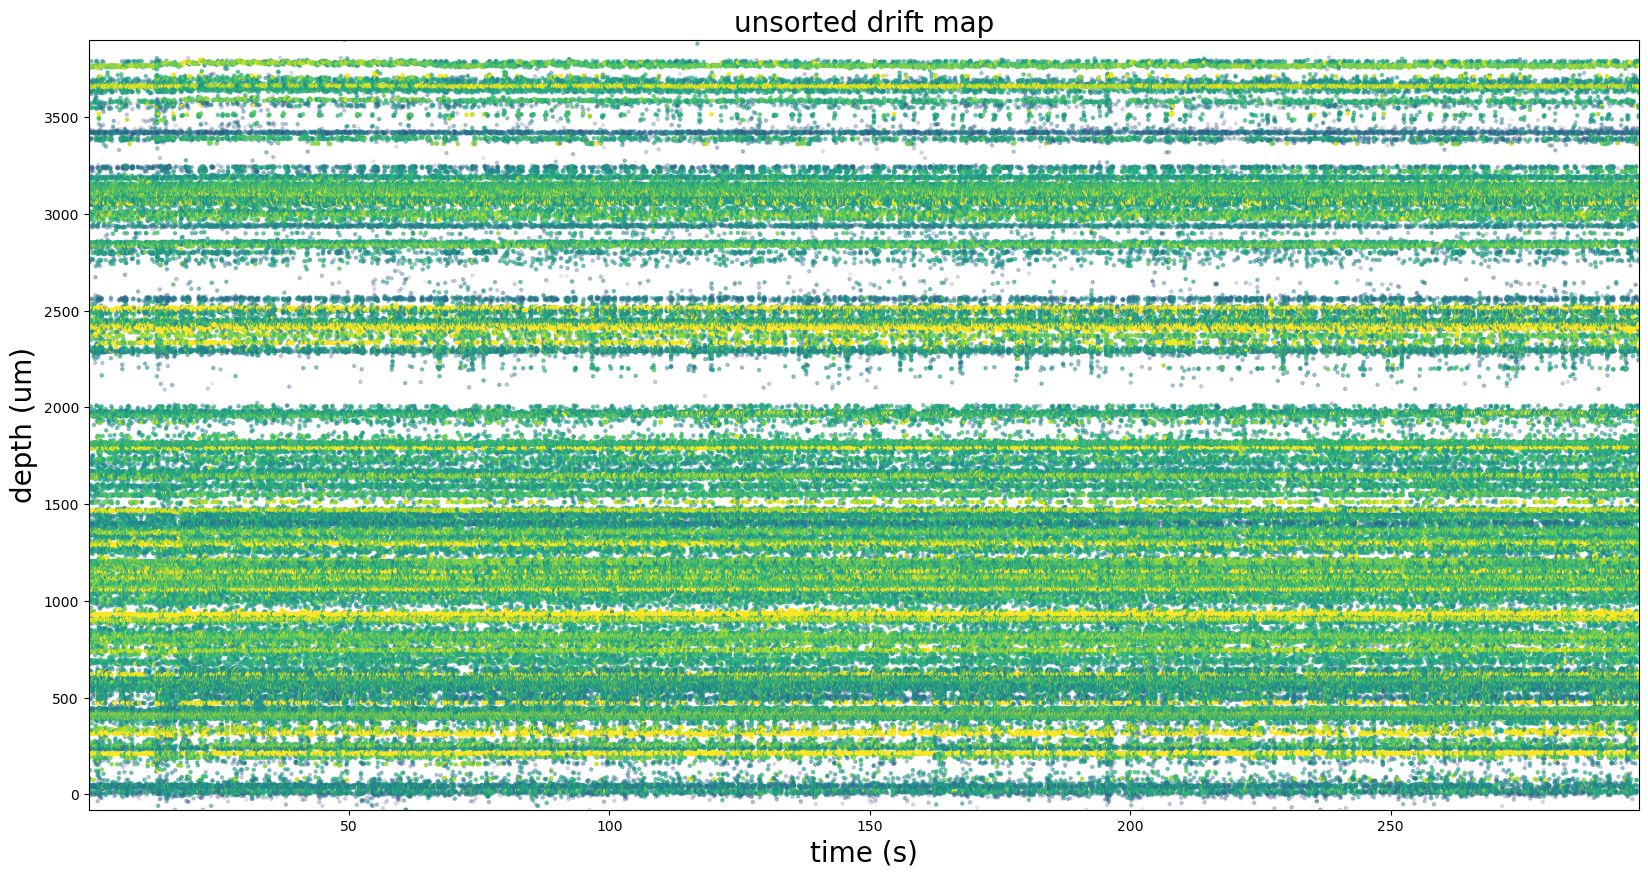

In [6]:
viz_tools.plot_drift_map(spikes_indices, spikes_features, n_spikes_display=500_000, samp_freq=samp_freq)

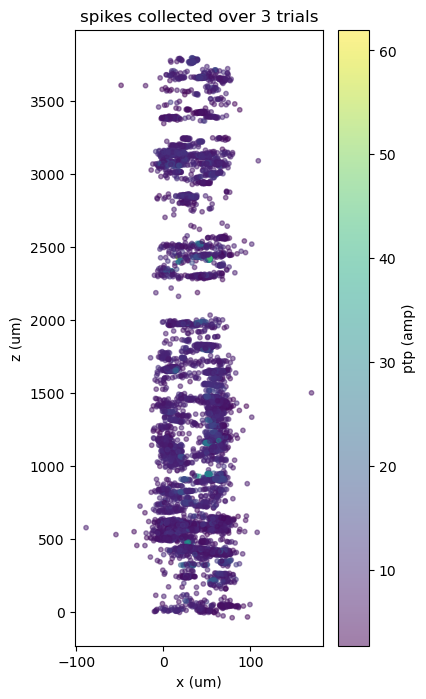

In [4]:
viz_tools.plot_spikes_features(trials, [1, 100, 200])

fit gmm

split-merge